In [1]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
dataset = np.load('D:/Modis/Africa/Africa_train_4pixel.npz')
data, labels = dataset['data'], dataset['labels']
X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.3, random_state=42, stratify=labels)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
X_temp=None
y_temp=None
#data_shape = (4, 4, 4)
num_classes = 8
y_train_categorical = to_categorical(y_train, num_classes=num_classes)
y_test_categorical = to_categorical(y_test, num_classes=num_classes)
y_val_categorical = to_categorical(y_val, num_classes=num_classes)

In [2]:
data.shape

(1792609, 4, 4, 4)

In [3]:
X_train.shape

(1254826, 4, 4, 4)

In [4]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2
from keras.models import Sequential,Model
from keras.layers import Dense, Conv2D, Conv1D, Conv3D, Flatten,Activation,MaxPool2D,MaxPooling2D,Dropout,LSTM
input_shape = X_train.shape[1:]
num_classes = 8
cnn_model = Sequential()
cnn_model.add(Conv2D(32, 2, activation='relu',padding="same", strides=1,input_shape=input_shape))
cnn_model.add(MaxPooling2D(2))
cnn_model.add(Conv2D(64, 2, activation='relu',padding="same", strides=1))
cnn_model.add(MaxPooling2D(2))
cnn_model.add(Conv2D(64, 2, activation='relu',padding="same", strides=1))
cnn_model.add(MaxPooling2D(1))
cnn_model.add(Conv2D(64, 2, activation='relu',padding="same", strides=1))
cnn_model.add(Flatten())
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(24, name='feature_extraction'))
cnn_model.add(Dense(num_classes, activation='softmax'))
cnn_model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
cnn_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 4, 4, 32)          544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 2, 2, 32)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 2, 64)          8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 1, 1, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 64)          16448     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 64)         

In [5]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('D:/Modis/Africa/CNN_2D_model.keras', monitor='val_loss', save_best_only=True)
history = cnn_model.fit(X_train, y_train_categorical, epochs=100, batch_size=256, validation_data=(X_val, y_val_categorical), callbacks=[early_stopping, model_checkpoint])

Epoch 1/100


4902/4902 [==============================] - 27s 5ms/step - loss: 0.3677 - accuracy: 0.8629 - val_loss: 0.3082 - val_accuracy: 0.8807
Epoch 2/100
4902/4902 [==============================] - 25s 5ms/step - loss: 0.3132 - accuracy: 0.8802 - val_loss: 0.2952 - val_accuracy: 0.8841
Epoch 3/100
4902/4902 [==============================] - 24s 5ms/step - loss: 0.3019 - accuracy: 0.8843 - val_loss: 0.2875 - val_accuracy: 0.8881
Epoch 4/100
4902/4902 [==============================] - 25s 5ms/step - loss: 0.2939 - accuracy: 0.8865 - val_loss: 0.2753 - val_accuracy: 0.8910
Epoch 5/100
4902/4902 [==============================] - 25s 5ms/step - loss: 0.2882 - accuracy: 0.8886 - val_loss: 0.2776 - val_accuracy: 0.8917
Epoch 6/100
4902/4902 [==============================] - 26s 5ms/step - loss: 0.2826 - accuracy: 0.8903 - val_loss: 0.2717 - val_accuracy: 0.8936
Epoch 7/100
4902/4902 [==============================] - 29s 6ms/step - loss: 0.2764 - accuracy: 0.8923 - val_loss: 0.2625

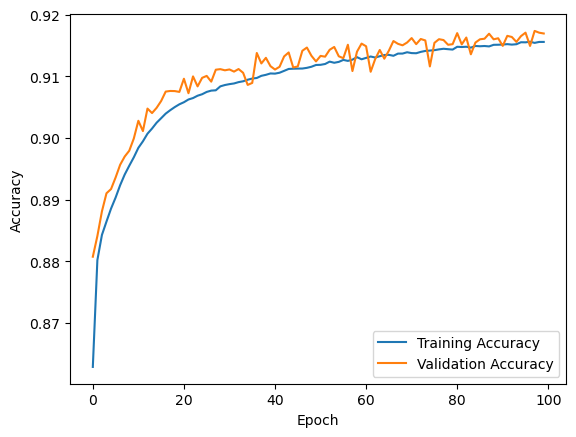

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

8403/8403 [==============================] - 16s 2ms/step
Overall Accuracy: 0.9197
Precision: 0.9178
Recall: 0.9197
F1-Score: 0.9168720133610493
Matthews Correlation Coefficient: 0.8662
Balanced Accuracy: 0.7432


<Axes: >

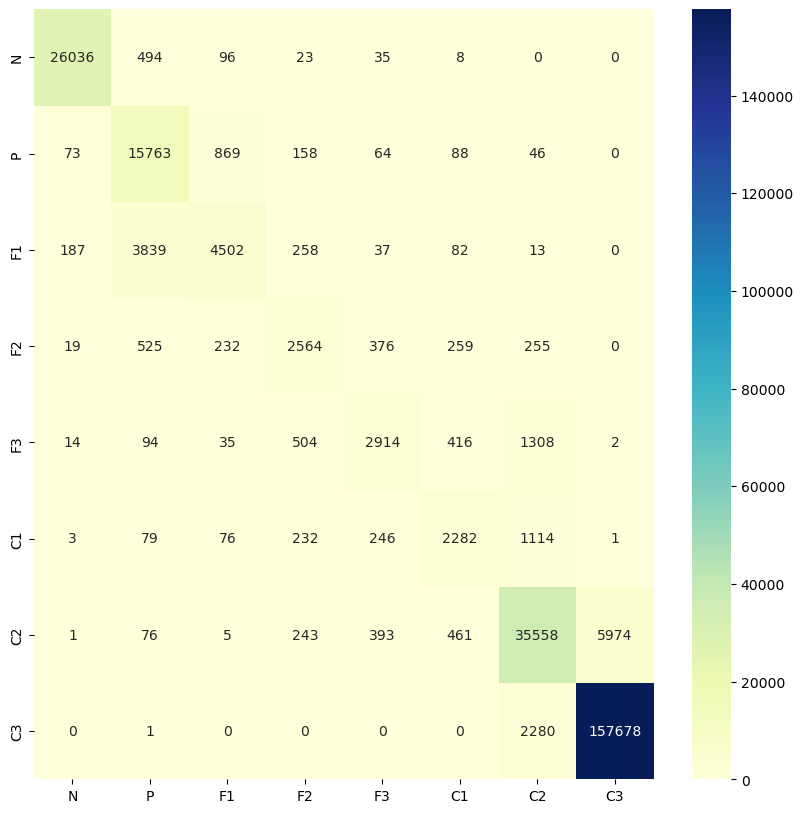

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, matthews_corrcoef, balanced_accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
import pandas as pd
import seaborn as sn
y_pred_categorical = cnn_model.predict(X_test)
y_pred = np.argmax(y_pred_categorical, axis=1)
y_test = np.argmax(y_test_categorical, axis=1)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
mcc = matthews_corrcoef(y_test, y_pred)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy:.4f}")
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1}')
print(f"Matthews Correlation Coefficient: {mcc:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = ["N","P","F1","F2","F3","C1","C2","C3"], columns = ["N","P","F1","F2","F3","C1","C2","C3"])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True, fmt="d",cmap="YlGnBu")

In [11]:
cm

array([[ 26036,    494,     96,     23,     35,      8,      0,      0],
       [    73,  15763,    869,    158,     64,     88,     46,      0],
       [   187,   3839,   4502,    258,     37,     82,     13,      0],
       [    19,    525,    232,   2564,    376,    259,    255,      0],
       [    14,     94,     35,    504,   2914,    416,   1308,      2],
       [     3,     79,     76,    232,    246,   2282,   1114,      1],
       [     1,     76,      5,    243,    393,    461,  35558,   5974],
       [     0,      1,      0,      0,      0,      0,   2280, 157678]],
      dtype=int64)

In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, balanced_accuracy_score, matthews_corrcoef)
from tensorflow.keras.utils import to_categorical
import numpy as np

# Number of folds
n_splits = 5
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Storage for metrics
acc_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
balanced_acc_scores = []
mcc_scores = []

X = data  # your data
y = labels  # your integer labels
num_classes = len(np.unique(y))  # number of classes

for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
    print(f"Training Fold {fold + 1} / {n_splits}")

    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Convert labels to categorical (one-hot encoding)
    y_train_to_categorical = to_categorical(y_train, num_classes=num_classes)
    y_val_to_categorical = to_categorical(y_val, num_classes=num_classes)
    # Train the model
    cnn_model.fit(X_train, y_train_to_categorical, epochs=10, batch_size=256, verbose=1)
    # Predict
    y_pred = cnn_model.predict(X_val)
    y_pred_classes = np.argmax(y_pred, axis=1)
    # Calculate metrics
    acc_scores.append(accuracy_score(y_val, y_pred_classes))
    precision_scores.append(precision_score(y_val, y_pred_classes, average='weighted'))
    recall_scores.append(recall_score(y_val, y_pred_classes, average='weighted'))
    f1_scores.append(f1_score(y_val, y_pred_classes, average='weighted'))
    balanced_acc_scores.append(balanced_accuracy_score(y_val, y_pred_classes))
    mcc_scores.append(matthews_corrcoef(y_val, y_pred_classes))
# After all folds
print("\nCross-Validation Results (averaged over folds):")
print(f"Accuracy: {np.mean(acc_scores):.4f}")
print(f"Precision: {np.mean(precision_scores):.4f}")
print(f"Recall: {np.mean(recall_scores):.4f}")
print(f"F1-Score: {np.mean(f1_scores):.4f}")
print(f"Balanced Accuracy: {np.mean(balanced_acc_scores):.4f}")
print(f"Matthews Correlation Coefficient (MCC): {np.mean(mcc_scores):.4f}")

Training Fold 1 / 5
Epoch 1/10
5602/5602 [==============================] - 30s 5ms/step - loss: 0.2091 - accuracy: 0.9170
Epoch 2/10
5602/5602 [==============================] - 30s 5ms/step - loss: 0.2088 - accuracy: 0.9172
Epoch 3/10
5602/5602 [==============================] - 30s 5ms/step - loss: 0.2088 - accuracy: 0.9172
Epoch 4/10
5602/5602 [==============================] - 31s 6ms/step - loss: 0.2088 - accuracy: 0.9173
Epoch 5/10
5602/5602 [==============================] - 32s 6ms/step - loss: 0.2088 - accuracy: 0.9174
Epoch 6/10
5602/5602 [==============================] - 31s 6ms/step - loss: 0.2085 - accuracy: 0.9175
Epoch 7/10
5602/5602 [==============================] - 29s 5ms/step - loss: 0.2085 - accuracy: 0.9176
Epoch 8/10
5602/5602 [==============================] - 29s 5ms/step - loss: 0.2083 - accuracy: 0.9177
Epoch 9/10
5602/5602 [==============================] - 32s 6ms/step - loss: 0.2084 - accuracy: 0.9175
Epoch 10/10
11204/11204 [============================